In [1]:
!pip install rembg==2.0.56

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.8 MB/s eta 0:00:00


# Imports

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from rembg import new_session, remove

# Constants

In [3]:
BASE_PATH = '/kaggle/input/key-images/'

# Helper Functions

In [4]:
def extract_key_pipeline(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Remove noise using Gaussian blur
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(blurred_image, 30, 150)
    
    return edges

In [11]:
def load_general_use_model(model_name='isnet-general-use'):
    '''
    Parameters:
    model_name: str
    '''
    session = new_session(model_name)
    return session


def remove_bg(input_img, only_mask=False):
    '''
    Remove background for single images
    '''
    # Make session
    session_isnet_general_use = load_general_use_model()

    # Output image
    output_img = remove(input_img,
                        session=session_isnet_general_use,
                        only_mask=only_mask)
    return output_img


def get_dataset_images_path(base_path):
    image_names = []
    images_path = []
    for _, _, img_names in os.walk(base_path):
        image_names.extend(img_names)
    
    images_path = [os.path.join(base_path, img_name) for img_name in image_names]
    return images_path


def plt_img(img_data, cmap='viridis'):
    '''
    cmap:
      * 'gray' (Grayscale)
      * 'binary' (Binary)
    '''
    plt.imshow(img_data, cmap=cmap)
    plt.axis('off')
    plt.show()

# Step 1: Mask Keys in image

In [13]:
get_dataset_images_path(BASE_PATH)

['/kaggle/input/key-images/4.jpeg',
 '/kaggle/input/key-images/2a.jpeg',
 '/kaggle/input/key-images/2b.jpeg',
 '/kaggle/input/key-images/1a.jpeg',
 '/kaggle/input/key-images/3.jpeg',
 '/kaggle/input/key-images/1b.jpeg']

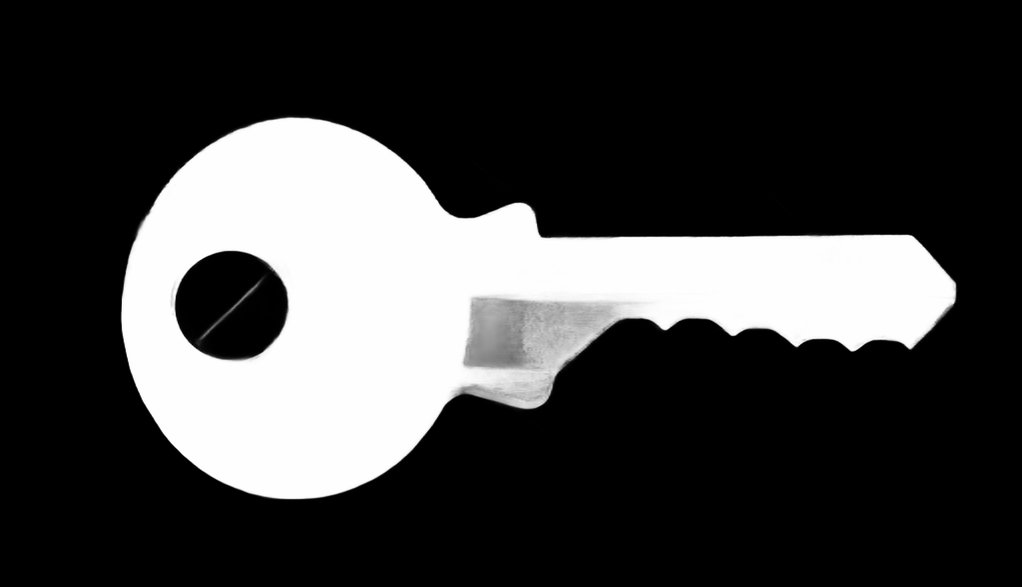

In [10]:
img = Image.open(f'{BASE_PATH}3.jpeg')
new_img = remove_bg(img, only_mask=True)
new_img

# Step1: Extracting Object (Key) from the image

In [ ]:
edges = extract_key_pipeline(f'{BASE_PATH}1a.jpeg')
plt_img(edges, cmap='binary')

In [ ]:
edges = extract_key_pipeline(f'{BASE_PATH}1b.jpeg')
plt_img(edges, cmap='binary')

In [ ]:
edges = extract_key_pipeline(f'{BASE_PATH}2a.jpeg')
plt_img(edges, cmap='binary')

In [ ]:
edges = extract_key_pipeline(f'{BASE_PATH}2b.jpeg')
plt_img(edges, cmap='binary')

In [ ]:
edges = extract_key_pipeline(f'{BASE_PATH}3.jpeg')
plt_img(edges)

In [ ]:
edges = extract_key_pipeline(f'{BASE_PATH}4.jpeg')
plt_img(edges)

In [ ]:
# Read the image
image = cv2.imread(f'{BASE_PATH}1a.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to preserve edges and texture
filtered_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

# Adaptive thresholding to create a binary image
binary_image = cv2.adaptiveThreshold(filtered_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Perform morphological operations to get the exterior boundary
# kernel = np.ones((3,3), np.uint8)
# boundary = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
boundary_image = np.zeros_like(image)
output = cv2.drawContours(boundary_image, contours, -1, (255, 255, 255), 1)
plt_img(output)

In [ ]:
plt_img(binary_image)

In [ ]:
plt_img(inverted_image)